In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [6]:
import pandas as pd
df = pd.read_csv('data/sales_data_sample.csv', encoding='latin1', nrows=5)
print(df.columns.tolist())

['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE', 'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME', 'DEALSIZE']


In [7]:
import pandas as pd
from prophet import Prophet

# 1. Load data with proper encoding
df = pd.read_csv('data/sales_data_sample.csv', encoding='latin1')

# 2. Prepare data (aggregate daily sales)
daily_sales = df.groupby('ORDERDATE')['SALES'].sum().reset_index()

# 3. Rename columns for Prophet
df_prophet = daily_sales.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})

# 4. Create and train model
model = Prophet()
model.fit(df_prophet)

# 5. Make forecast (next 90 days)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# 6. Save results
forecast[['ds', 'yhat']].to_csv('sales_forecast.csv')

19:43:54 - cmdstanpy - INFO - Chain [1] start processing
19:43:54 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
forecast[['ds', 'yhat']].to_csv('sales_forecast.csv', index=False)
print("Forecast saved to sales_forecast.csv")

Forecast saved to sales_forecast.csv


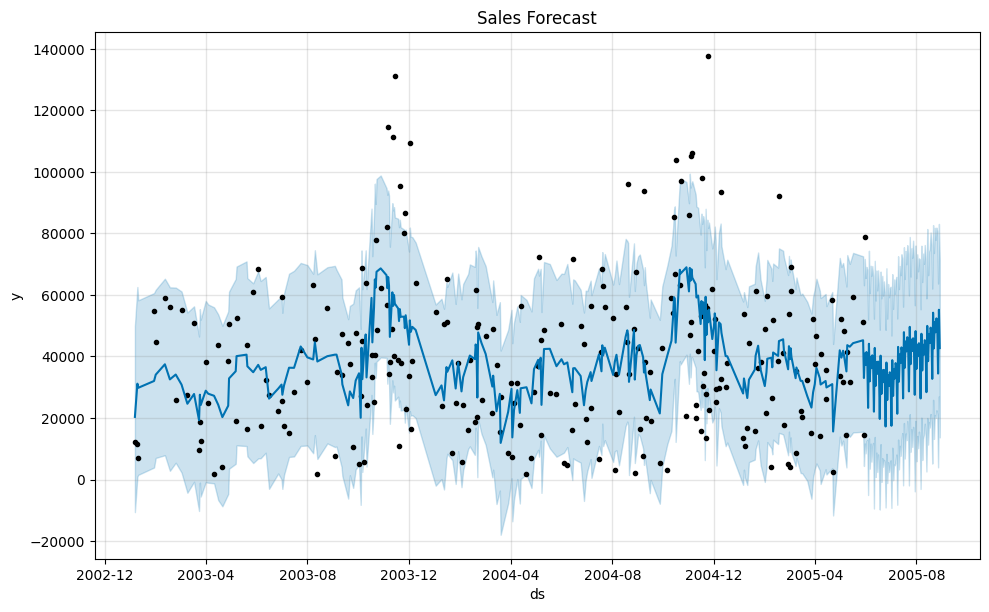

In [9]:
model.plot(forecast)
plt.title('Sales Forecast')
plt.show()